In [94]:
# Import working libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [95]:
df = pd.read_csv("file:///Users/kwakuamoakohene/Downloads/Mall_Customers.csv")

In [96]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis


In [97]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


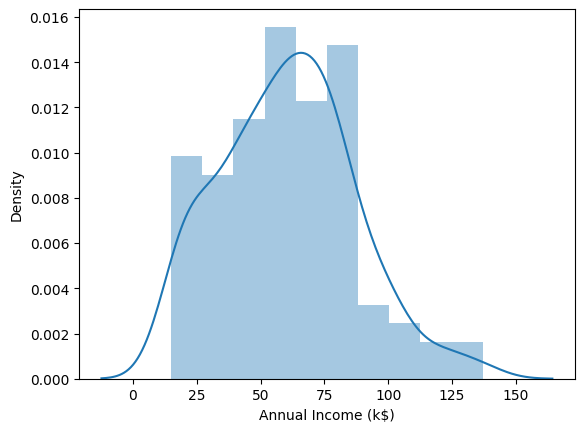

In [98]:
sns.distplot(df['Annual Income (k$)']);

In [99]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

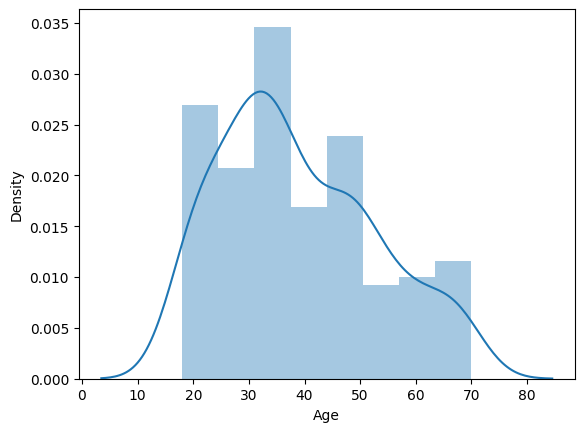

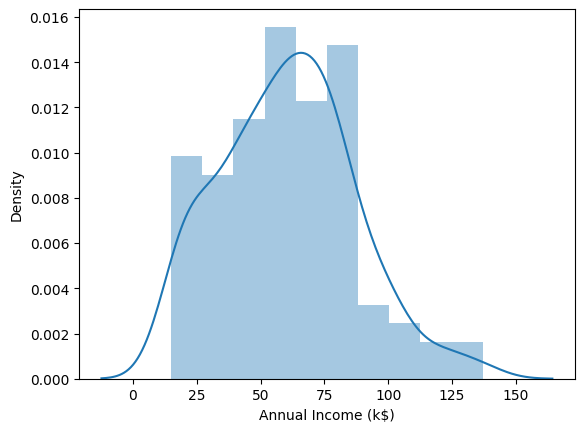

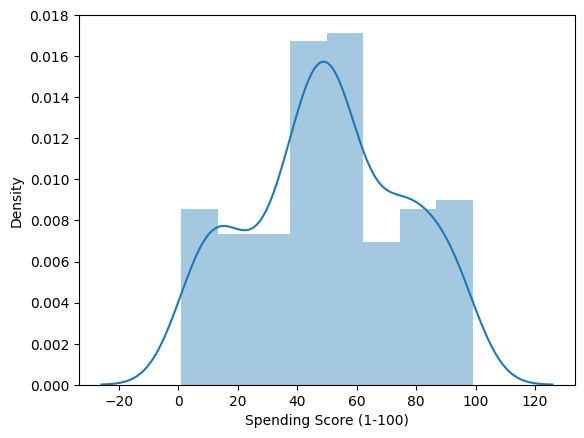

In [100]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

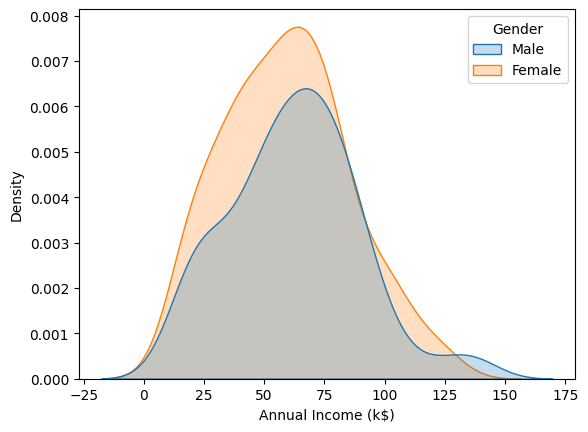

In [101]:
sns.kdeplot(data=df, x='Annual Income (k$)',shade=True, hue='Gender');

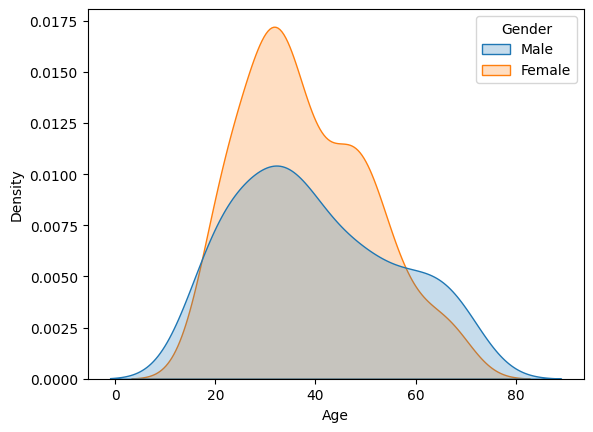

In [102]:
sns.kdeplot(data=df, x='Age',shade=True, hue='Gender');

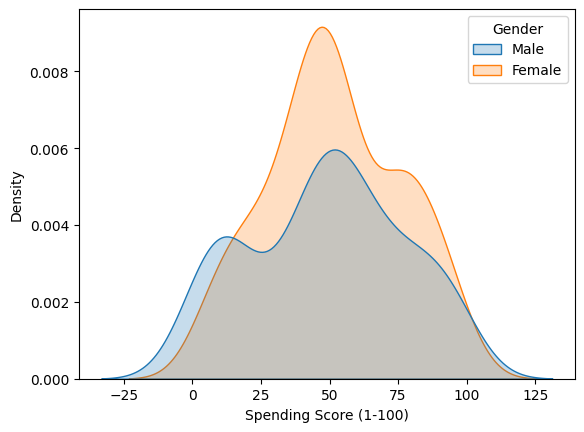

In [103]:
sns.kdeplot(data=df, x='Spending Score (1-100)',shade=True, hue='Gender');

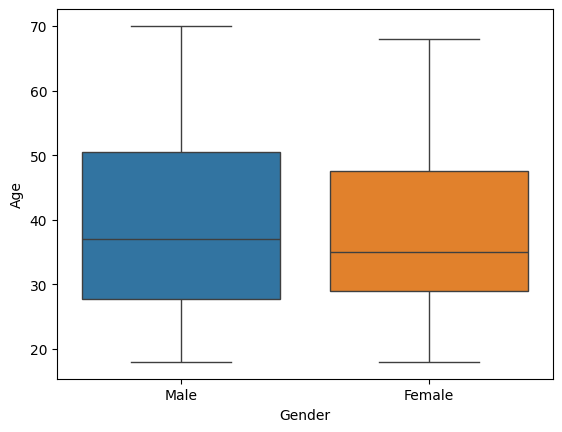

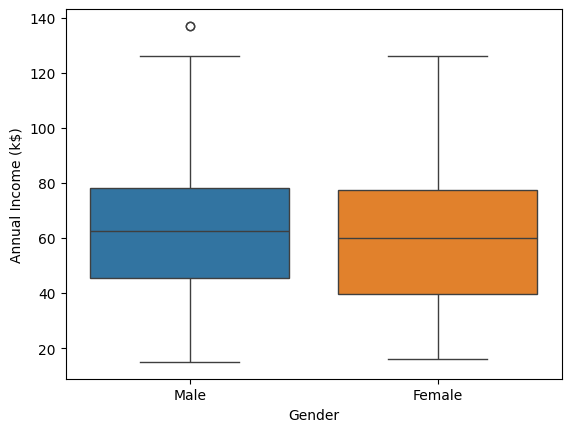

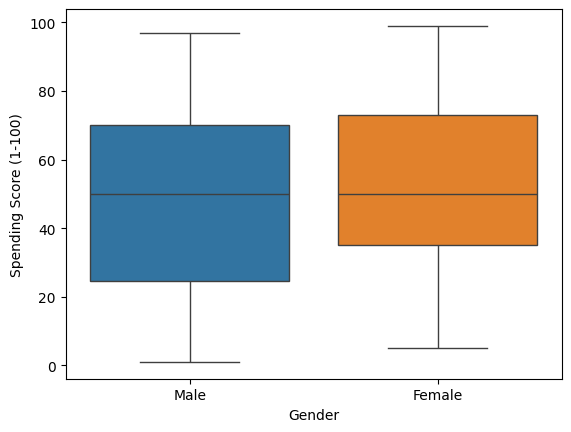

In [104]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(data=df,x='Gender',y=df[i],hue='Gender')

In [105]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

#  Bivariate Analysis

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

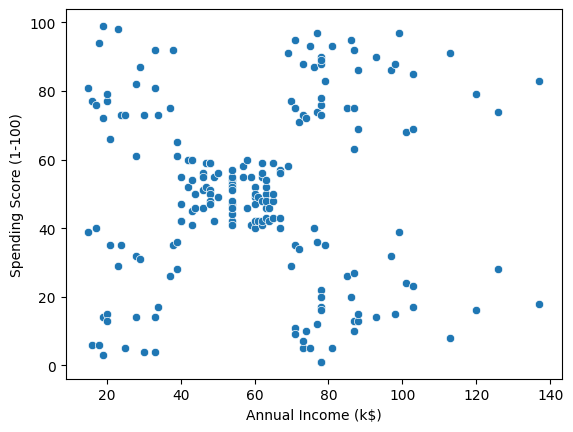

In [106]:
sns.scatterplot(data=df, x='Annual Income (k$)',y= 'Spending Score (1-100)')

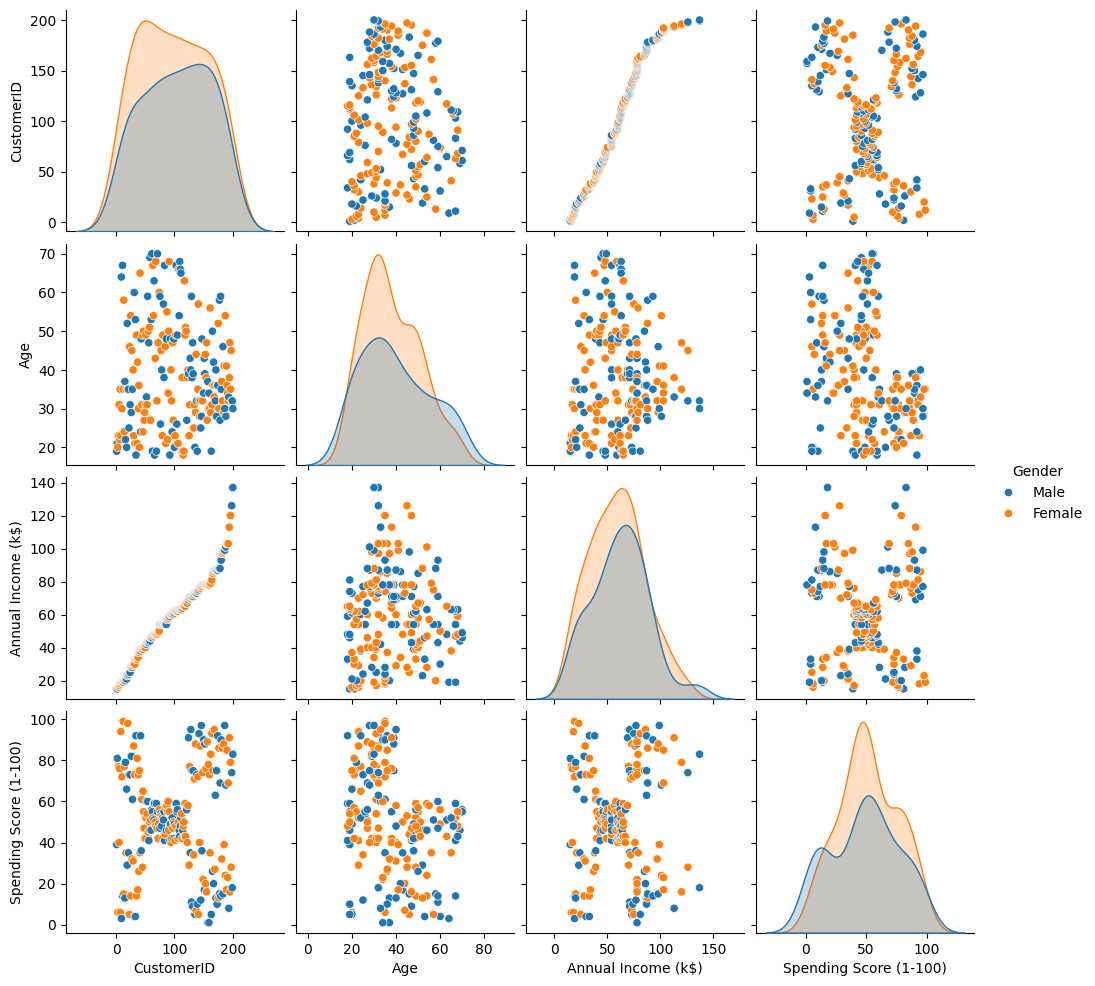

In [107]:
# df=df.drop('CustomerID',axis=1)
sns.pairplot(df, hue='Gender')

In [108]:
df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [109]:
df.corr(numeric_only=True)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

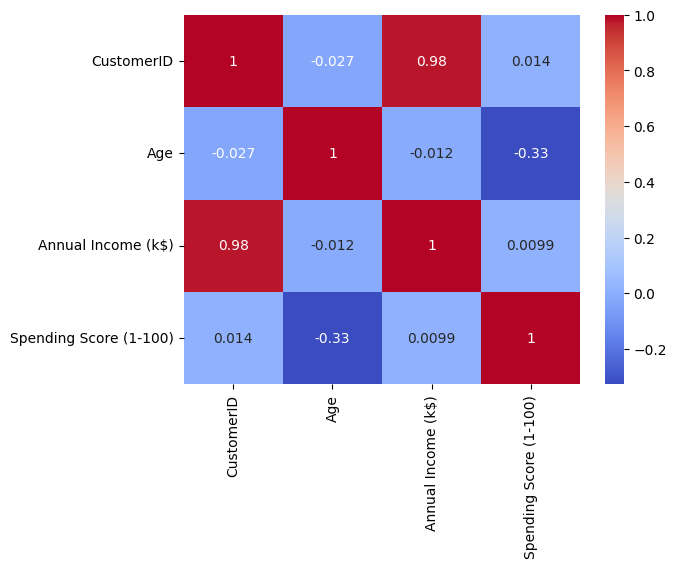

In [110]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

# Clustering - Univariate, Bivariate, Multivariate

In [111]:
clustering1 = KMeans(n_clusters=3)

In [112]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [113]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [114]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [115]:
df['Income Cluster'].value_counts()

Income Cluster
0    90
1    58
2    52
Name: count, dtype: int64

In [116]:
clustering1.inertia_

25642.577306218685

In [117]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster'],
      dtype='object')

In [118]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [119]:
inertia_scores

[137277.28000000003,
 48660.88888888889,
 25341.285871863223,
 13278.112713472485,
 10424.639880952383,
 5740.70709382151,
 3976.358363858364,
 3155.02264957265,
 2426.0584776334777,
 1979.0465367965364]

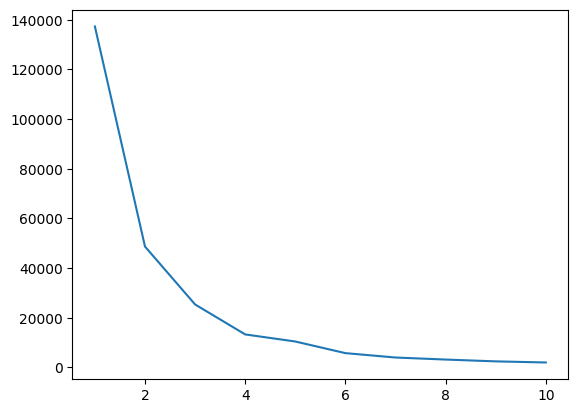

In [120]:
plt.plot(range(1,11),inertia_scores);

In [121]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,40.922222,61.622222,50.533333
1,37.120690,29.551724,49.689655
2,37.192308,93.307692,50.192308


In [122]:
# Bivariate Clustering

In [123]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['Spending and Income Cluster']=clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,3


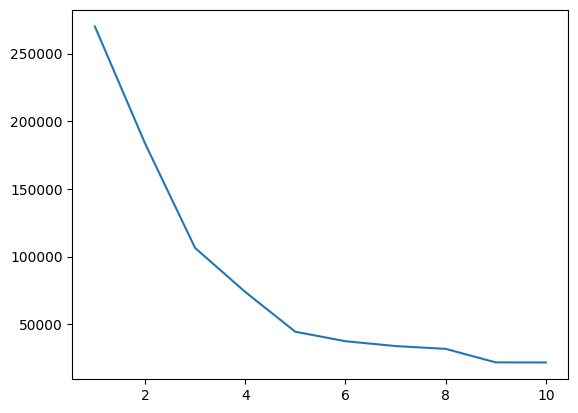

In [124]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),inertia_scores2) 

In [125]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

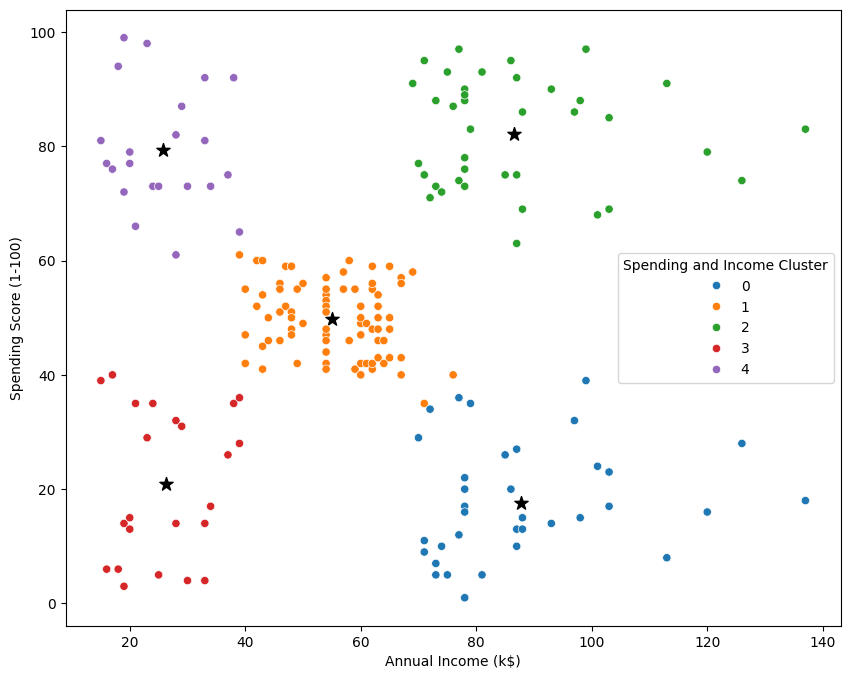

In [126]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',
palette='tab10')
plt.savefig('clustering_bivariate.png')

In [127]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.472222,0.527778
1,0.587500,0.412500
2,0.538462,0.461538
3,0.608696,0.391304
4,0.590909,0.409091


In [128]:
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,40.666667,87.750000,17.583333
1,42.937500,55.087500,49.712500
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


# Multivariate Clustering

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
scale = StandardScaler()

In [131]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,3


In [132]:
dff = pd.get_dummies(df,drop_first=True)
dff.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,3,True
1,2,21,15,81,1,4,True
2,3,20,16,6,1,3,False
3,4,23,16,77,1,4,False
4,5,31,17,40,1,3,False


In [133]:
dff.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Cluster', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [134]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Male']]
dff.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


In [135]:
dff = scale.fit_transform(dff)

In [136]:
dff = pd.DataFrame(scale.fit_transform(dff))

In [137]:
dff.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


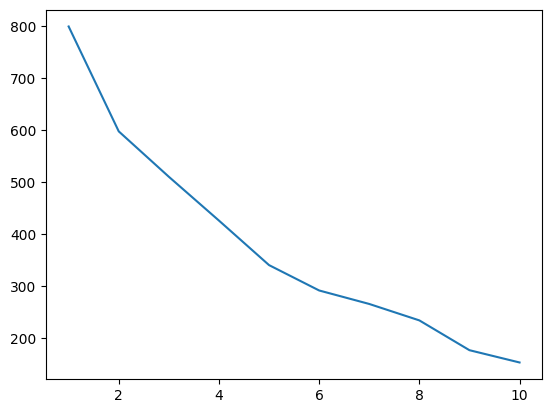

In [138]:
inertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    inertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),inertia_scores3) 

In [139]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,1,3
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,1,3
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,1,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,2
196,197,Female,45,126,28,2,0
197,198,Male,32,126,74,2,2
198,199,Male,32,137,18,2,0


In [140]:
df.to_csv('MarketSegmentation.csv')